# Análise Exploratória de Dados sobre <span style="color:green">Jogos na Steam</span>
## Por: Vinícius Leôncio 
### Módulo: Estatística I
---

O objetivo deste projeto é proporcionar a oportunidade de aplicar os conhecimentos adquiridos ao longo da disciplina de Estatística I em um contexto prático, relevante e data-driven. Com uma análise exploratória e levantando uma hipótese, utilizando uma base de dados sobre os jogos na Steam, maior plataforma de distribuição digital de jogos digitais, utilizando um conjunto de dados real, a fim de extrair insights e entender melhor a base de dados.

Base de dados usada: https://www.kaggle.com/datasets/nikdavis/steam-store-games

Foi explorado o seguinte dataset nesse arquivo: 
- steam.csv

---

## Introdução


**Motivação:** Entender se comparar o tempo de jogo mediano com as avaliações positivas para ver se jogos com maior tempo de gameplay têm melhor recepção dos usuários. Vamos usar o valor **mediano** de tempo de jogo em vez da **média**, pois a mediana fornece uma medida de tendência central que não é afetada por valores extremos.

**Hipótese:** Jogos com tempo de jogo mediano(median_playtime) mais alto tendem a ter avaliações mais positivas.

- **H0 (hipótese nula):**  Não há correlação entre o tempo de jogo mediano e as avaliações dos usuários
- **H1 (hipótese alternativa):** Existe uma correlação entre o tempo de jogo mediano e as avaliações dos usuários



---
## Conhecendo a Base de Dados

Esse conjunto de dados fornece informações sobre diversos aspectos de jogos eletrônicos na loja da Steam, como gênero e número estimado de proprietários. Reunido por volta de maio de 2019, contém a maioria dos jogos da loja lançados antes dessa data.



### Tabela Descritiva

| Campo          | Descrição                                                                 |
|------------------|-----------------------------------------------------------------------------|
| appid            | Unique identifier for each title                                            |
| name             | Title of app (game)                                                         |
| release_date     | Release date in format YYYY-MM-DD                                           |
| english          | Language support: 1 if is in English                                        |
| developer        | Name (or names) of developer(s). Semicolon delimited if multiple             |
| publisher        | Name (or names) of publisher(s). Semicolon delimited if multiple             |
| platforms        | Semicolon delimited list of supported platforms. At most includes: windows;mac;linux |
| required_age     | Minimum required age according to PEGI UK standards. Many with 0 are unrated or unsupplied. |
| categories       | Semicolon delimited list of game categories, e.g. single-player;multi-player |
| genres           | Semicolon delimited list of game genres, e.g. action;adventure               |
| steamspy_tags    | Semicolon delimited list of top steamspy game tags, similar to genres but community voted, e.g. action;adventure |
| achievements     | Number of in-games achievements, if any                                      |
| positive_ratings | Number of positive ratings, from SteamSpy                                    |
| negative_ratings | Number of negative ratings, from SteamSpy                                    |
| average_playtime | Average user playtime, from SteamSpy                                         |
| median_playtime  | Median user playtime, from SteamSpy                                          |
| owners           | Estimated number of owners. Contains lower and upper bound (like 20000-50000). |
| price            | Current full price of title in GBP, (pounds sterling)                        |

### Visão Geral

A seguir sera feita uma análise descritiva para entender melhor a estrutura da base de dados escolhida.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_steam = pd.read_csv('steam.csv')
df_steam


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


### Algumas Medidas Estatísticas

In [3]:
df_steam.describe().round(2)

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,27075.00,27075.00,27075.00,27075.00,27075.00,27075.00,27075.00,27075.00,27075.00
mean,596203.51,0.98,0.35,45.25,1000.56,211.03,149.80,146.06,6.08
std,250894.17,0.14,2.41,352.67,18988.72,4284.94,1827.04,2353.88,7.87
min,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,401230.00,1.00,0.00,0.00,6.00,2.00,0.00,0.00,1.69
50%,599070.00,1.00,0.00,7.00,24.00,9.00,0.00,0.00,3.99
75%,798760.00,1.00,0.00,23.00,126.00,42.00,0.00,0.00,7.19
max,1069460.00,1.00,18.00,9821.00,2644404.00,487076.00,190625.00,190625.00,421.99


### Nomes e Tipos de Dados das Colunas

In [4]:
df_steam.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

### Dados Faltantes

In [5]:
df_steam.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

---
## Tratamento dos Dados

### *'median_playtime'*

Como visto acima, uma das nossa principais colunas para esse estudo, a 'median_playtime', parece ter muitos dados zerados:

In [6]:
df_steam['median_playtime'].value_counts(normalize=True)

median_playtime
0       0.772114
1       0.005725
3       0.002659
2       0.001921
9       0.001773
          ...   
2379    0.000037
2478    0.000037
1052    0.000037
2390    0.000037
816     0.000037
Name: proportion, Length: 1312, dtype: float64

Podemos ver que cerca de **77%** dos valores estao zerados. Partindo da premissa que esses dados podem ser dados faltantes e que prejudicariam a análise, iremos então excluir esses registros ao mesmo tempo que manteremos apenas as colunas relevantes.

In [7]:
df_steam = df_steam[df_steam['median_playtime'] > 0][['appid', 'name', 'release_date', 'positive_ratings', 'negative_ratings', 'median_playtime']]
df_steam.describe()

,appid,positive_ratings,negative_ratings,median_playtime
count,6.170000e+03,6.170000e+03,6170.000000,6170.000000
mean,4.000430e+05,4.181495e+03,858.130470,640.918476
std,2.064139e+05,3.961343e+04,8945.578447,4898.936256
min,1.000000e+01,0.000000e+00,0.000000,1.000000
25%,2.659500e+05,1.060000e+02,38.000000,77.000000
50%,3.887050e+05,4.080000e+02,113.000000,228.000000
75%,5.395950e+05,1.704750e+03,365.000000,371.000000
max,1.051310e+06,2.644404e+06,487076.000000,190625.000000


Percebemos então que a **média(640)** distoa bastante para cima do **terceiro quartil(371)**, dando indício que temos outliers. Vamos segmentar melhor o quartil final e ver de forma gráfica a coluna:

In [8]:
df_steam['median_playtime'].describe(percentiles=[0.75, 0.85, 0.95, 0.98, 0.99])

count      6170.000000
mean        640.918476
std        4898.936256
min           1.000000
50%         228.000000
75%         371.000000
85%         574.650000
95%        1611.500000
98%        3593.400000
99%        5701.040000
max      190625.000000
Name: median_playtime, dtype: float64

<Axes: >

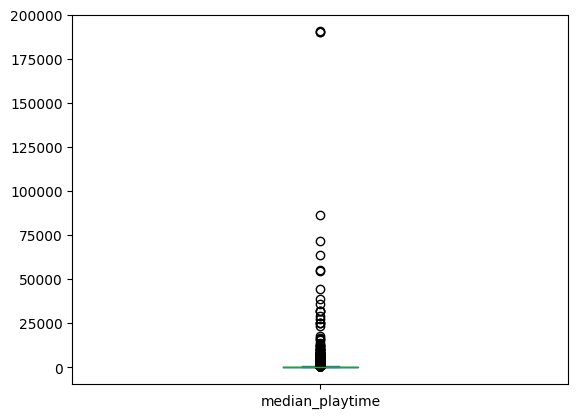

In [9]:
df_steam['median_playtime'].plot(kind='box')

Confirmada a presença de outliers, vamos entao exclui-los filtrando os dados, excluindo os 1% dos valores mais altos:

In [10]:
cutoff_value_median_playtime = df_steam['median_playtime'].describe(percentiles=[0.05, 0.95])['95%']
df_steam = df_steam[df_steam['median_playtime'] < cutoff_value_median_playtime]
cutoff_value_median_playtime = df_steam['median_playtime'].describe(percentiles=[0.05, 0.95])['5%']
df_steam = df_steam[df_steam['median_playtime'] > cutoff_value_median_playtime]
df_steam.describe()

,appid,positive_ratings,negative_ratings,median_playtime
count,5.541000e+03,5541.000000,5541.000000,5541.000000
mean,3.934662e+05,3243.934488,612.018769,286.813752
std,2.029599e+05,18225.634807,3208.943585,284.203247
min,1.000000e+01,0.000000,0.000000,5.000000
25%,2.637000e+05,108.000000,39.000000,95.000000
50%,3.850700e+05,410.000000,113.000000,228.000000
75%,5.286700e+05,1637.000000,351.000000,343.000000
max,1.051310e+06,863507.000000,142079.000000,1606.000000


### *'positive_ratings' e 'negative_ratings'*

Vamos fazer a mesma limpeza para 'positive_ratings'

In [11]:
df_steam['positive_ratings'].describe(percentiles=[0.75, 0.85, 0.95, 0.98, 0.99])

count      5541.000000
mean       3243.934488
std       18225.634807
min           0.000000
50%         410.000000
75%        1637.000000
85%        3449.000000
95%       11930.000000
98%       26819.400000
99%       45936.400000
max      863507.000000
Name: positive_ratings, dtype: float64

In [12]:
cutoff_value_positive_ratings = df_steam['positive_ratings'].describe(percentiles=[0.05, 0.95])['95%']
df_steam = df_steam[df_steam['positive_ratings'] < cutoff_value_positive_ratings]
cutoff_value_positive_ratings = df_steam['positive_ratings'].describe(percentiles=[0.05, 0.95])['5%']
df_steam = df_steam[df_steam['positive_ratings'] > cutoff_value_positive_ratings]
df_steam.describe()

,appid,positive_ratings,negative_ratings,median_playtime
count,4.988000e+03,4988.000000,4988.000000,4988.000000
mean,3.931079e+05,1285.287089,331.175822,277.289294
std,2.031646e+05,2092.763739,700.005621,278.749369
min,2.000000e+01,19.000000,0.000000,5.000000
25%,2.650900e+05,125.750000,44.000000,87.750000
50%,3.839900e+05,410.000000,113.000000,223.000000
75%,5.263100e+05,1402.250000,311.000000,334.000000
max,1.051310e+06,11893.000000,15403.000000,1606.000000


Foi visto que existem valores zero para as quantidades de avaliações positivas e avaliações negativas, mas não é interessante se o mesmo registro(jogo) não tiver valores em ambas as colunas, visto que isso significa que o jogo não chegou a ser avaliado ou tem esse dado faltante.

In [13]:
df_steam[(df_steam['positive_ratings'] == 0) & (df_steam['negative_ratings'] == 0)].count()['appid']

0

Nenhum registro com esse problema foi encontrado.

Para deixar nossa análise mais acertiva, não vamos considerar jogos que tem poucas avaliações, visto que esse tipo de situação poderia não refletir a opnião da maioria. Por exemplo, um jogo com 'positive_ratings' igual a 3 e 'negative_ratings' igual a 0, não consegue necessariamente informar se aquele título é bem recebido pelo público pois falta quantidade de avaliações.
Para isso, vamos criar uma nova coluna onde mostra a soma das avaliações e filtrar o dataset a partir dela.

In [14]:
df_steam['total_ratings'] = df_steam['positive_ratings'] + df_steam['negative_ratings']

df_steam = df_steam[df_steam['total_ratings'] > 19]
df_steam.count()['appid']

4987

Com o dataset filtrado, agora podemos adicionar a coluna que vai nos mostrar a razão entre as avaliações positivas e o total de avaliações, quanto maior o valor, melhor a recepção do título pelo público

In [15]:
df_steam['positive_ratio'] = df_steam['positive_ratings'] / df_steam['total_ratings']
df_steam['positive_ratio'].describe()

count    4987.000000
mean        0.743464
std         0.167501
min         0.122581
25%         0.643808
50%         0.779917
75%         0.876599
max         1.000000
Name: positive_ratio, dtype: float64

---
## Visualização dos Dados

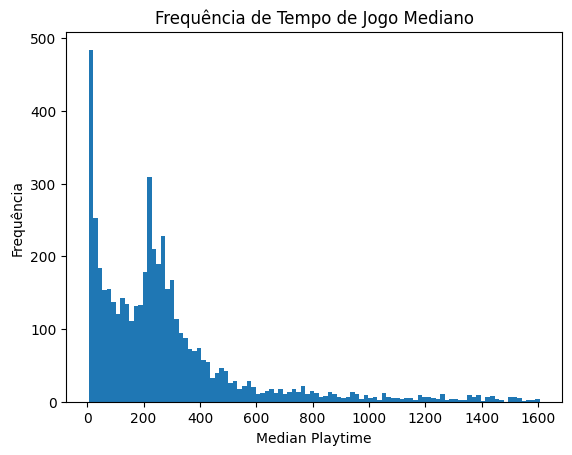

In [16]:
df_steam['median_playtime'].plot(kind='hist', bins=100)
plt.title('Frequência de Tempo de Jogo Mediano')
plt.xlabel('Median Playtime')
plt.ylabel('Frequência')
plt.show()

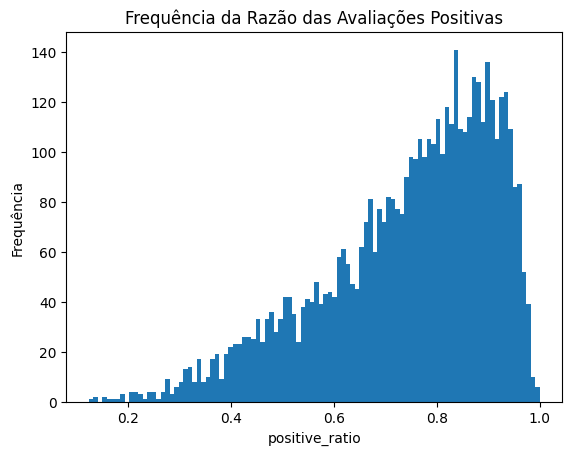

In [17]:
df_steam['positive_ratio'].plot(kind='hist', bins=100)
plt.title('Frequência da Razão das Avaliações Positivas')
plt.xlabel('positive_ratio')
plt.ylabel('Frequência')
plt.show()

---
## Teste de Hipótese

Teste de Normalidade

In [18]:
estatistico, p_value_playtime = stats.normaltest(df_steam['median_playtime'])

if p_value_playtime < 0.05:
    print("'median_playtime' não é uma distribuição normal.")
else:
    print("'median_playtime' é uma distribuição normal.")

'median_playtime' não é uma distribuição normal.


In [19]:
estatistico, p_value_ratio = stats.normaltest(df_steam['positive_ratio'])

if p_value_playtime < 0.05:
    print("'positive_ratio' não é uma distribuição normal.")
else:
    print("'positive_ratio' é uma distribuição normal.")

'positive_ratio' não é uma distribuição normal.


Agora que sabemos que não estamos trabalhando com dados normais, iremos aplicar a Correlação de Kendall, pois ela não faz suposições sobre a distribuição dos dados.

In [20]:
df_steam_sorted = df_steam.sort_values(by='median_playtime')

corr, p_value = stats.kendalltau(df_steam_sorted['median_playtime'], df_steam_sorted['positive_ratio'])

print(f"Coeficiente de Correlação de Kendall: {corr}")
print(f"Valor P: {p_value}")

if p_value < 0.05:
    print("Existe uma correlação entre o tempo de jogo mediano e as avaliações positivas dos usuários")
else:
    print("Não existe uma correlação entre o tempo de jogo mediano e as avaliações positivas dos usuários")

Coeficiente de Correlação de Kendall: 0.034573772257687485
Valor P: 0.0002553142172586727
Existe uma correlação entre o tempo de jogo mediano e as avaliações positivas dos usuários


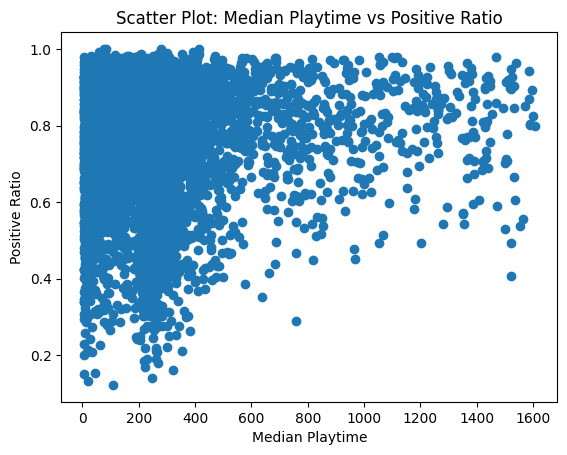

In [21]:
plt.scatter(df_steam_sorted['median_playtime'], df_steam_sorted['positive_ratio'])
plt.xlabel('Median Playtime')
plt.ylabel('Positive Ratio')
plt.title('Scatter Plot: Median Playtime vs Positive Ratio')
plt.show()